In [8]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from load_to_db import data_file_dir, read_data_from_csv
%matplotlib inline

In [9]:
file_dir = data_file_dir()
df = read_data_from_csv(file_dir)

In [10]:
AM105 = df[df['tag_id'] == 'AM105']
print(AM105)

       Unnamed: 0                timestamp      long       lat  \
0               0  2007-08-13 00:30:00.000  31.87091 -24.81373   
1               1  2007-08-13 02:00:00.000  31.87399 -24.81483   
2               2  2007-08-13 03:31:00.000  31.87724 -24.81673   
3               3  2007-08-13 04:00:00.000  31.87822 -24.81569   
4               4  2007-08-13 06:00:00.000  31.89554 -24.79870   
...           ...                      ...       ...       ...   
15093       15093  2009-08-12 19:30:00.000  31.81571 -24.71985   
15094       15094  2009-08-12 20:00:00.000  31.81562 -24.71988   
15095       15095  2009-08-12 20:30:00.000  31.81518 -24.72014   
15096       15096  2009-08-12 21:00:00.000  31.81211 -24.72042   
15097       15097  2009-08-12 21:30:00.000  31.81086 -24.72041   

       external-temperature tag_id  year  month  day  hour  minute  
0                      24.0  AM105  2007      8   13     0      30  
1                      23.0  AM105  2007      8   13     2       0  


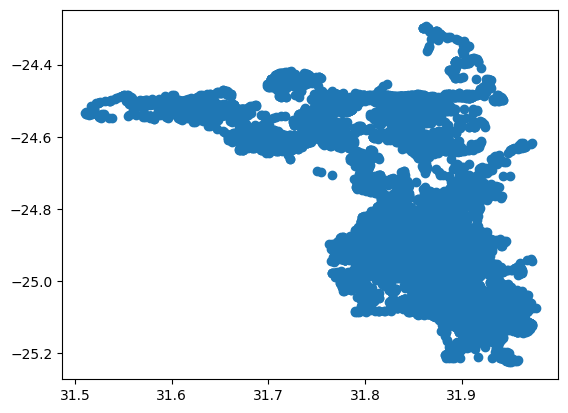

In [11]:
# Data inspection with scatter plot
plt.scatter(AM105['long'], AM105['lat'])
plt.show()

In [12]:
scaler = StandardScaler()

AM105_normalized = scaler.fit_transform(AM105[['long', 'lat']])

AM105_norm = pd.DataFrame(AM105_normalized, columns = ['long', 'lat'])
print(AM105_norm)

AM105_non_norm = AM105[['long', 'lat']]
print(AM105_non_norm)

           long       lat
0      0.299062  0.208949
1      0.338112  0.203793
2      0.379317  0.194888
3      0.391742  0.199762
4      0.611334  0.279399
...         ...       ...
15093 -0.400792  0.648989
15094 -0.401933  0.648849
15095 -0.407512  0.647630
15096 -0.446435  0.646318
15097 -0.462283  0.646365

[15098 rows x 2 columns]
           long       lat
0      31.87091 -24.81373
1      31.87399 -24.81483
2      31.87724 -24.81673
3      31.87822 -24.81569
4      31.89554 -24.79870
...         ...       ...
15093  31.81571 -24.71985
15094  31.81562 -24.71988
15095  31.81518 -24.72014
15096  31.81211 -24.72042
15097  31.81086 -24.72041

[15098 rows x 2 columns]


In [38]:
# Create empty model
km_norm = KMeans(4, random_state = 8, n_init = 'auto')

# Train the model
km_norm.fit(AM105_norm)

KMeans(n_clusters=4, n_init='auto', random_state=8)

In [39]:
# Create empty model
km_non_norm = KMeans(n_clusters = 4, random_state = 8, n_init = 'auto')

# Train the model
km_non_norm.fit(AM105_non_norm)

KMeans(n_clusters=4, n_init='auto', random_state=8)

In [40]:
# Inspection of labels
print(km_norm.labels_)
print(km_non_norm.labels_)

[3 3 3 ... 3 3 3]
[2 2 2 ... 2 2 2]


In [41]:
# The lowest SSE value
print('SSE value for normalized data:', km_norm.inertia_)
print('SSE value for non-normalized data:', km_non_norm.inertia_)

SSE value for normalized data: 5655.731763667558
SSE value for non-normalized data: 84.00117229711772


In [42]:
# Final locations of the centroid
print('Centroids for normalized data:', km_norm.cluster_centers_)
print('Centroids for non-normalized data:', km_non_norm.cluster_centers_)

Centroids for normalized data: [[-2.08725596  1.48939739]
 [ 0.59068987 -0.9212299 ]
 [ 0.01746607  1.55120695]
 [ 0.09699883  0.01980033]]
Centroids for non-normalized data: [[ 31.68642494 -24.54272294]
 [ 31.88665274 -25.05155979]
 [ 31.86099286 -24.83883997]
 [ 31.85342937 -24.52102467]]


In [43]:
# The number of iterations required to converge
print('No. iterations (normalized data):', km_norm.n_iter_)
print('No. iterations (non-normalized data):', km_non_norm.n_iter_)

No. iterations (normalized data): 18
No. iterations (non-normalized data): 5


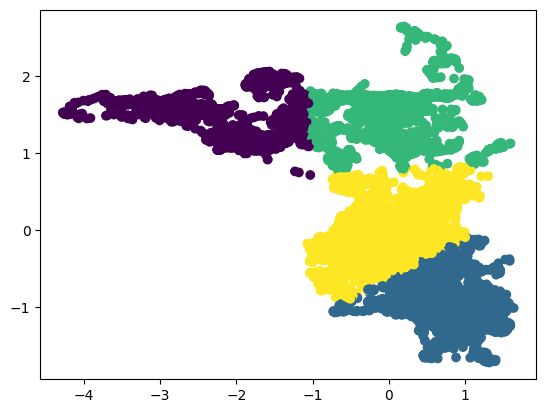

In [44]:
# Evaluate the result in a plot, the labels from our model correspond to 
# our samples and can be used to color the plot
plt.scatter(AM105_norm['long'], AM105_norm['lat'], c = km_norm.labels_)
plt.show()

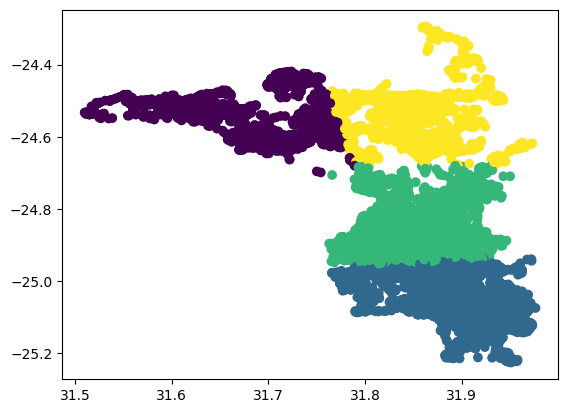

In [45]:
# Evaluate the result in a plot, the labels from our model correspond to 
# our samples and can be used to color the plot
plt.scatter(AM105_non_norm['long'], AM105_non_norm['lat'], c = km_non_norm.labels_)
plt.show()

In [47]:
from kneed import KneeLocator
# from sklearn.metrics import silhouette_score

In [49]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 'auto',
    #"max_iter": 300,
    "random_state": 8}

# A list holds the SSE values for each k
sse_norm = []
for k in range(1, 11):
    kmeans_norm = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans_norm.fit(AM105_norm)
    sse_norm.append(kmeans_norm.inertia_)

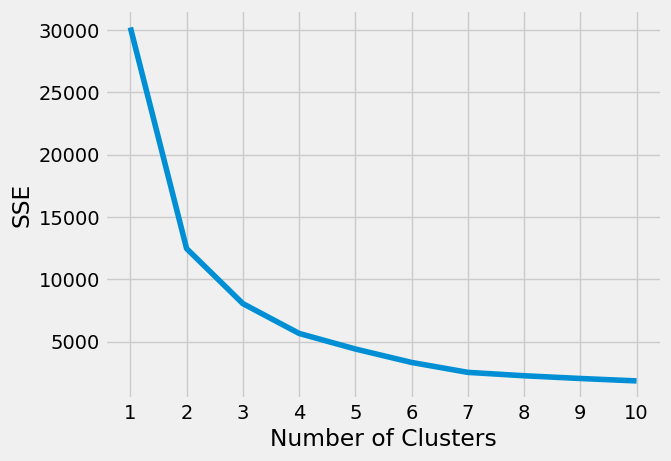

In [51]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse_norm)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [53]:
kl = KneeLocator(range(1, 11), sse_norm, curve="convex", direction="decreasing")

print(kl.elbow)

3


# DBSCAN

In [54]:
# Imports
import numpy as np
from sklearn.cluster import DBSCAN

In [55]:
db = DBSCAN(eps = 0.1, min_samples = 35).fit(AM105_norm)
labels = db.labels_

In [56]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [60]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 12
Estimated number of noise points: 967


In [61]:
AM105_norm_np = AM105_norm.to_numpy()
print(AM105_norm_np)

[[ 0.29906207  0.20894938]
 [ 0.33811189  0.20379339]
 [ 0.37931706  0.1948876 ]
 ...
 [-0.40751155  0.64763009]
 [-0.44643459  0.64631765]
 [-0.46228273  0.64636453]]


In [62]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

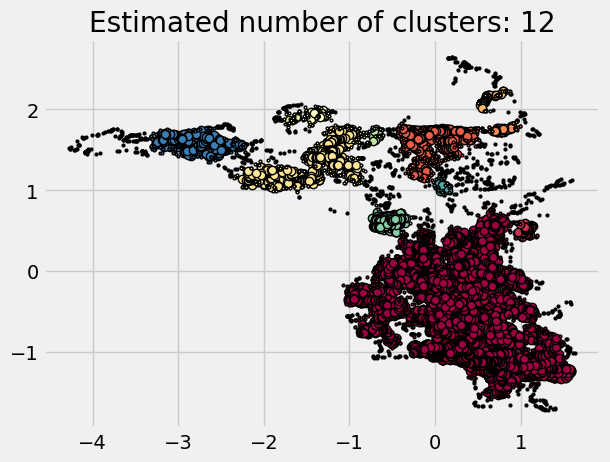

In [76]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = AM105_norm_np[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    xy = AM105_norm_np[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=2,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()